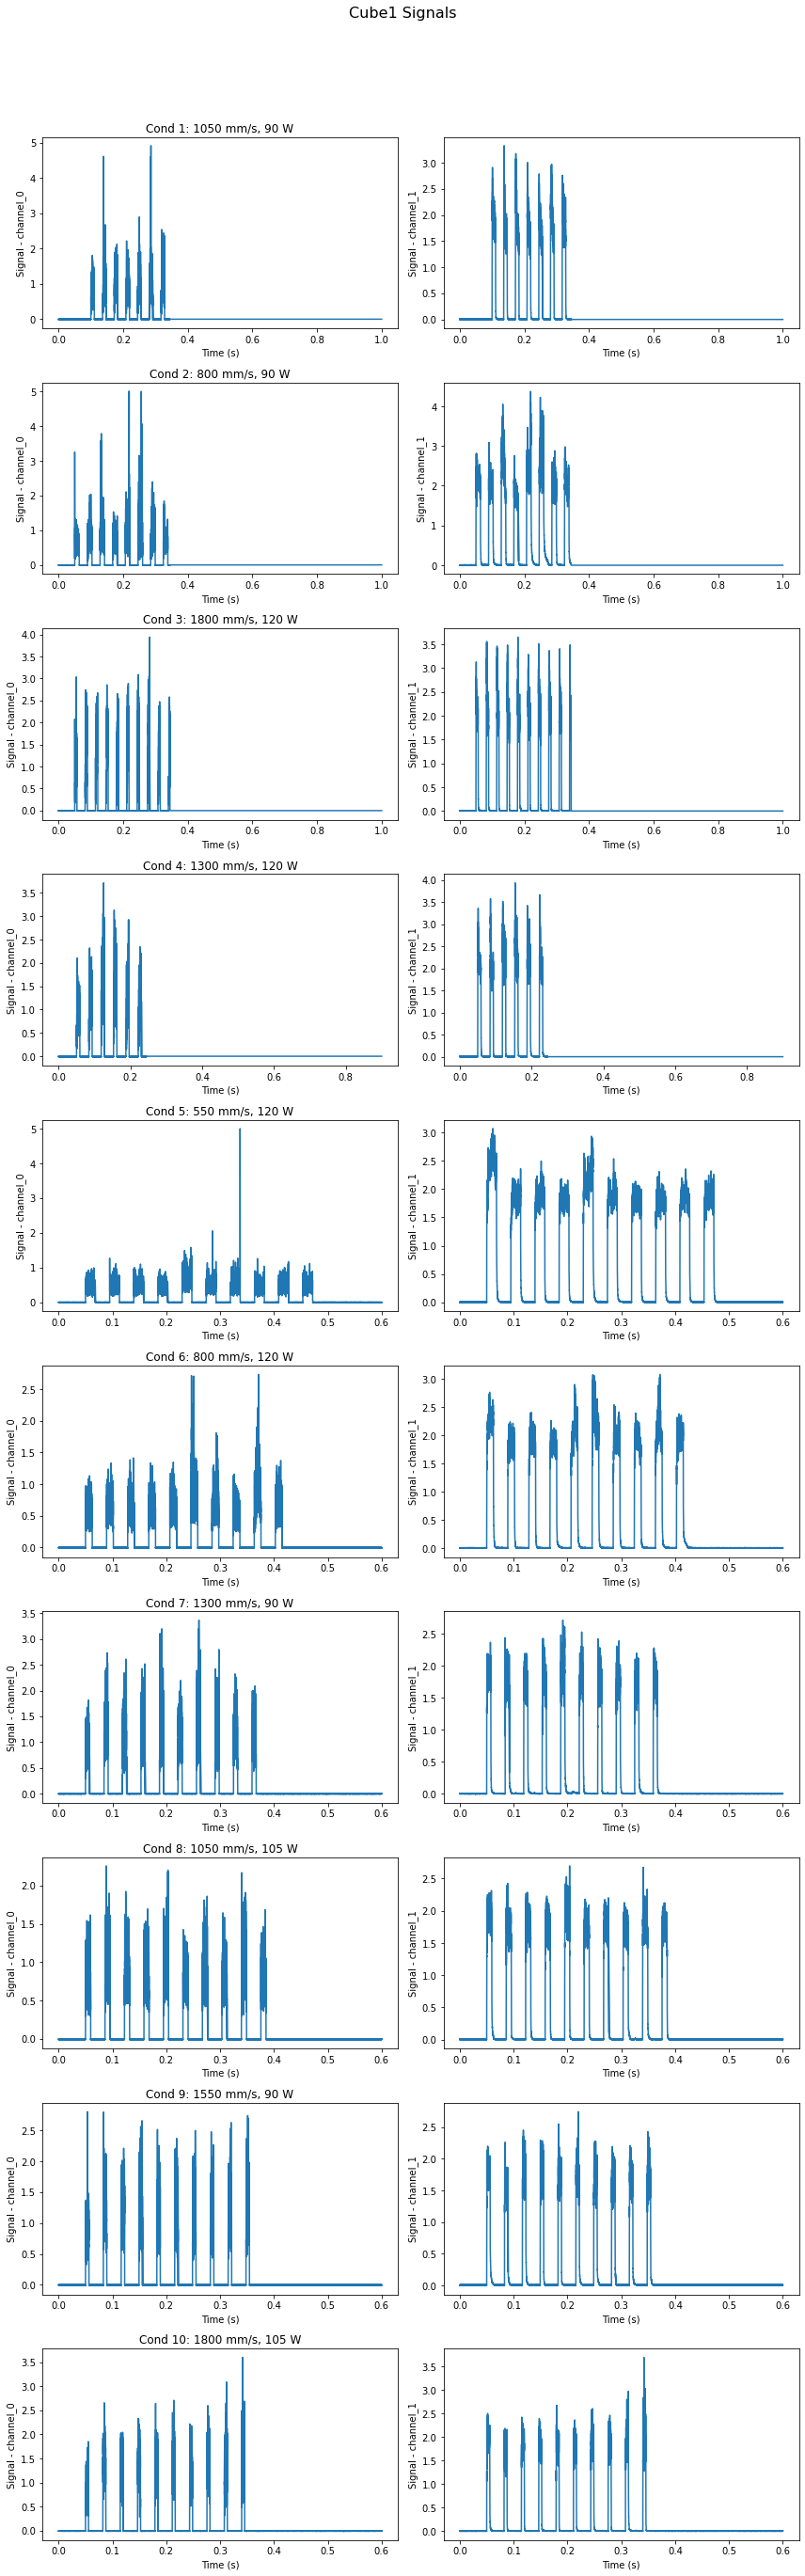

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Path to the Excel file with parameters
excel_path = './experiment_parameters.xlsx'  
xl = pd.ExcelFile(excel_path)

# Load parameters from Excel into a dictionary
params_dict = {}
for sheet_name in xl.sheet_names:
    df = xl.parse(sheet_name)
    # Assuming the Excel sheet has columns 'Speed (mm/s)', 'Power (W)', and 'Power perc (%)' for each condition
    params_dict[sheet_name] = df[['Speed (mm/s)', 'Power (W)', 'Power perc (%)']].to_dict('records')

# Path to data
base_path = './Data/Neuchatel_Ti64/'

def plot_cube_signals(cube_number):
    cube_name = f'Cube{cube_number}'  # Construct cube name
    cube_path = os.path.join(base_path, cube_name)
    channels = ['channel_0', 'channel_1']
    
    # Sampling rate and time step calculation
    sampling_rate = 200000  # 200,000 Hz
    time_step = 1 / sampling_rate  # Time step in seconds

    # 10 conditions, with 2 subplots (for channels 0 and 1) per condition
    fig, axes = plt.subplots(10, 2, figsize=(12, 40))  
    fig.suptitle(f'{cube_name} Signals', fontsize=16)
    
    for i in range(10):  # Assuming 10 files per condition
        for j, channel in enumerate(channels):
            file_path = os.path.join(cube_path, channel, f'File_{i}.csv')
            data = pd.read_csv(file_path).values
            
            # Create a time array for the x-axis
            time_array = np.arange(0, len(data) * time_step, time_step)
            
            # Ensure time_array is the same length as data
            time_array = time_array[:len(data)]
            
            # Plotting
            ax = axes[i, j]
            ax.plot(time_array, data)
            param_set = params_dict[cube_name][i]  # Retrieve parameters for this condition
            if j == 0:
                ax.set_title(f'Cond {i+1}: {int(param_set["Speed (mm/s)"])} mm/s, {int(param_set["Power (W)"])} W')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel(f'Signal - {channel}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

plot_cube_signals(1)


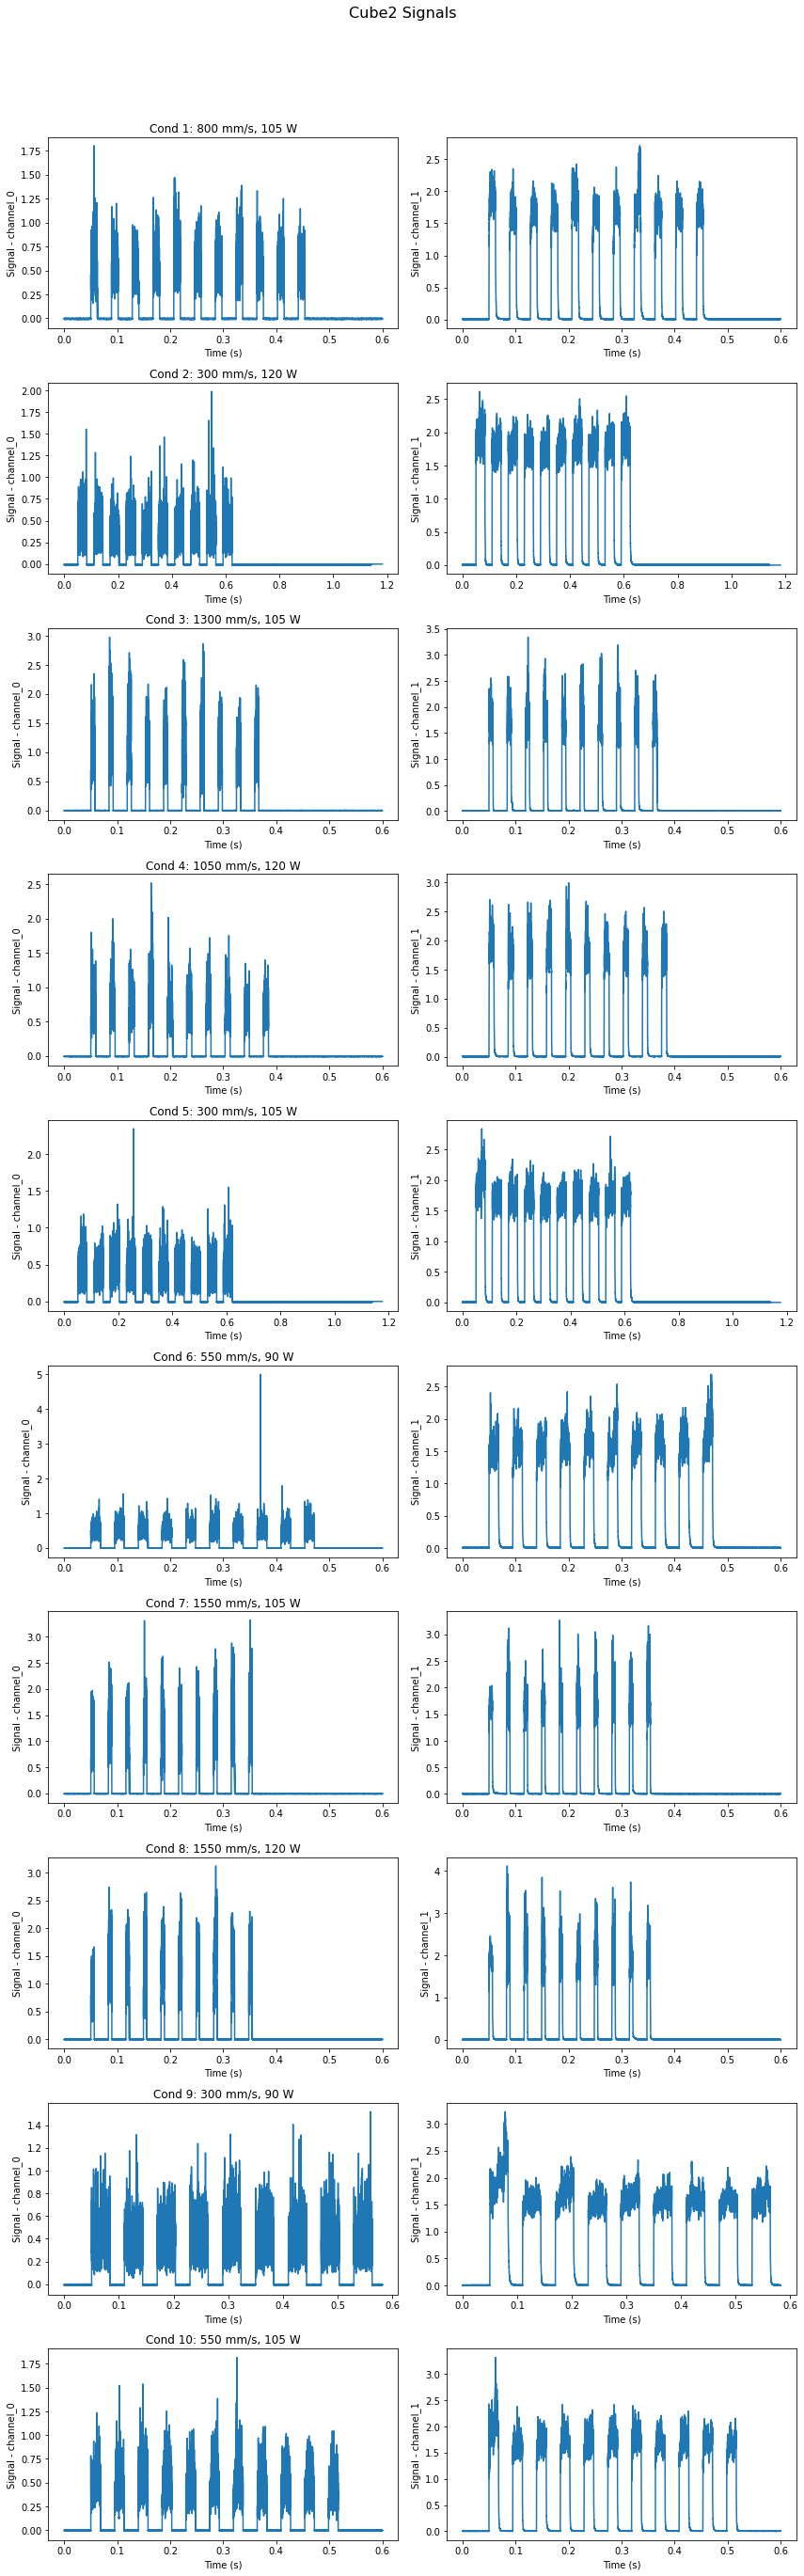

In [2]:
plot_cube_signals(2)


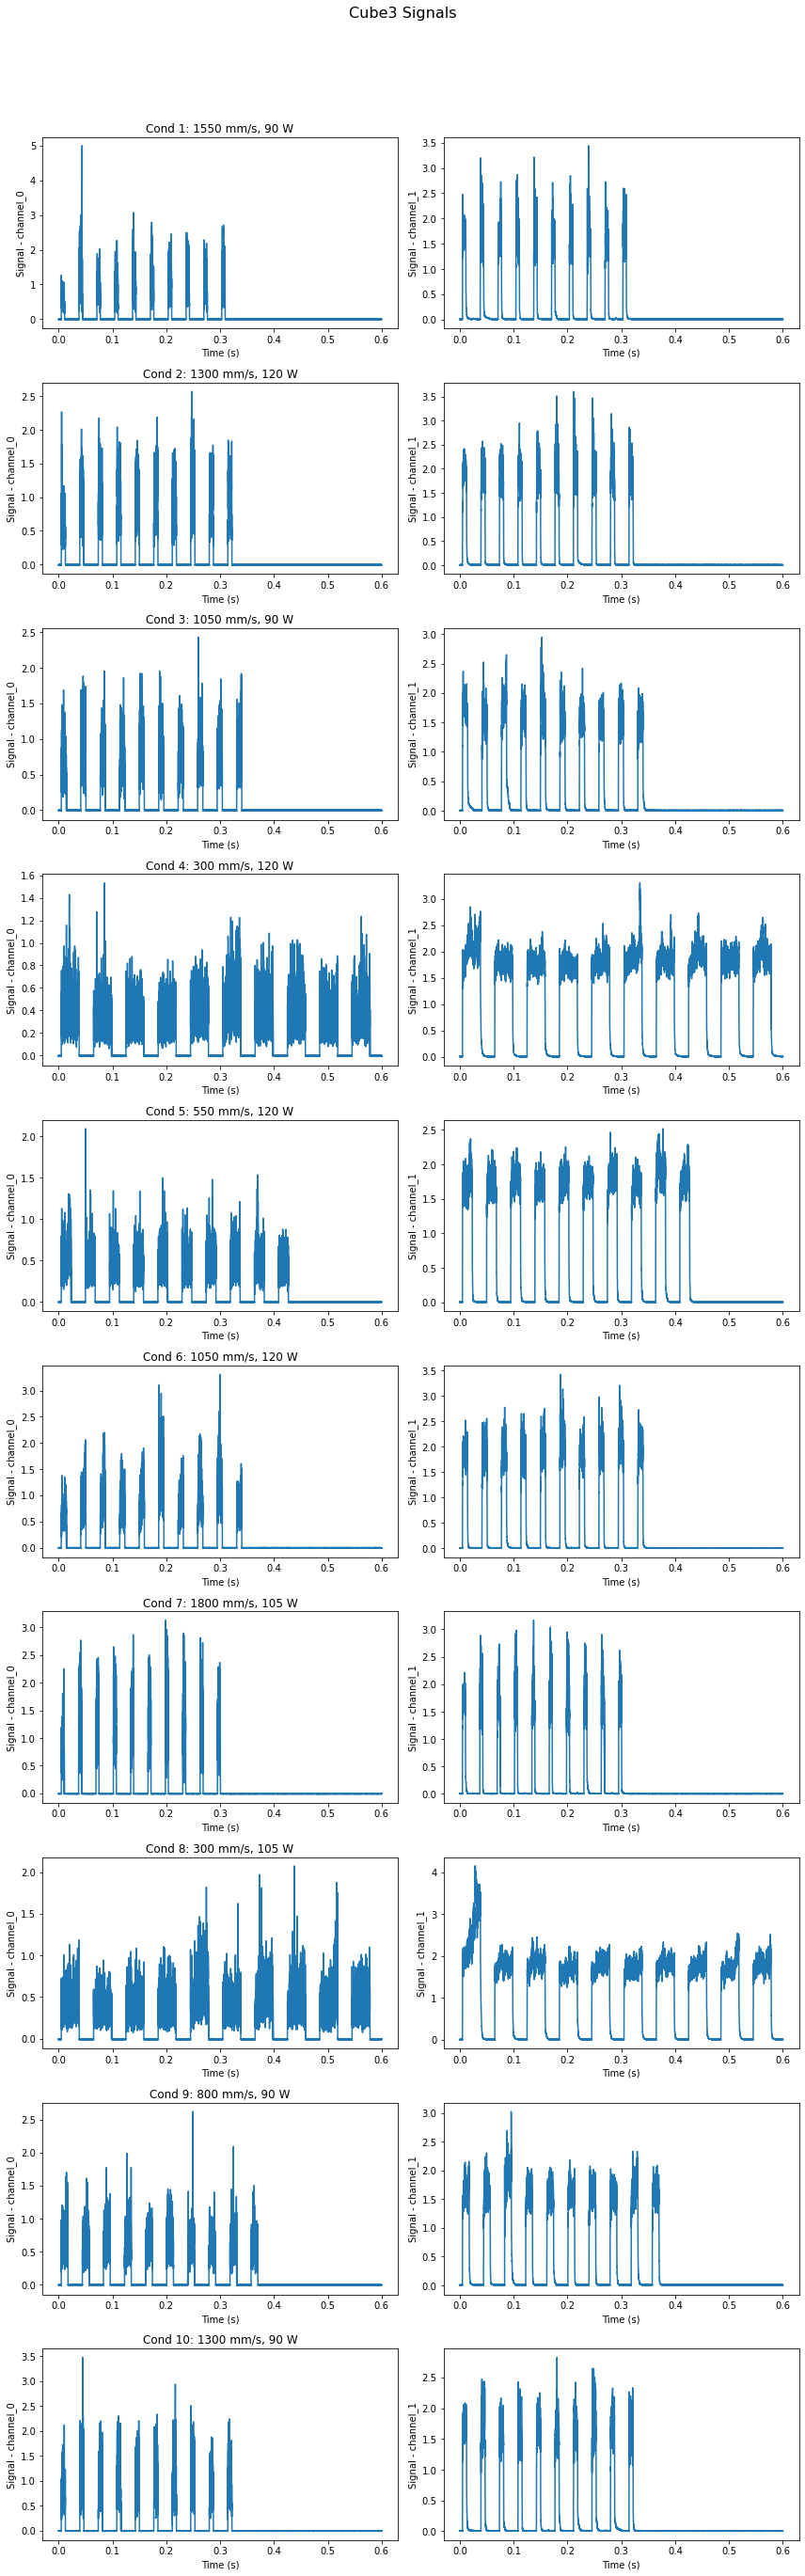

In [3]:
plot_cube_signals(3)


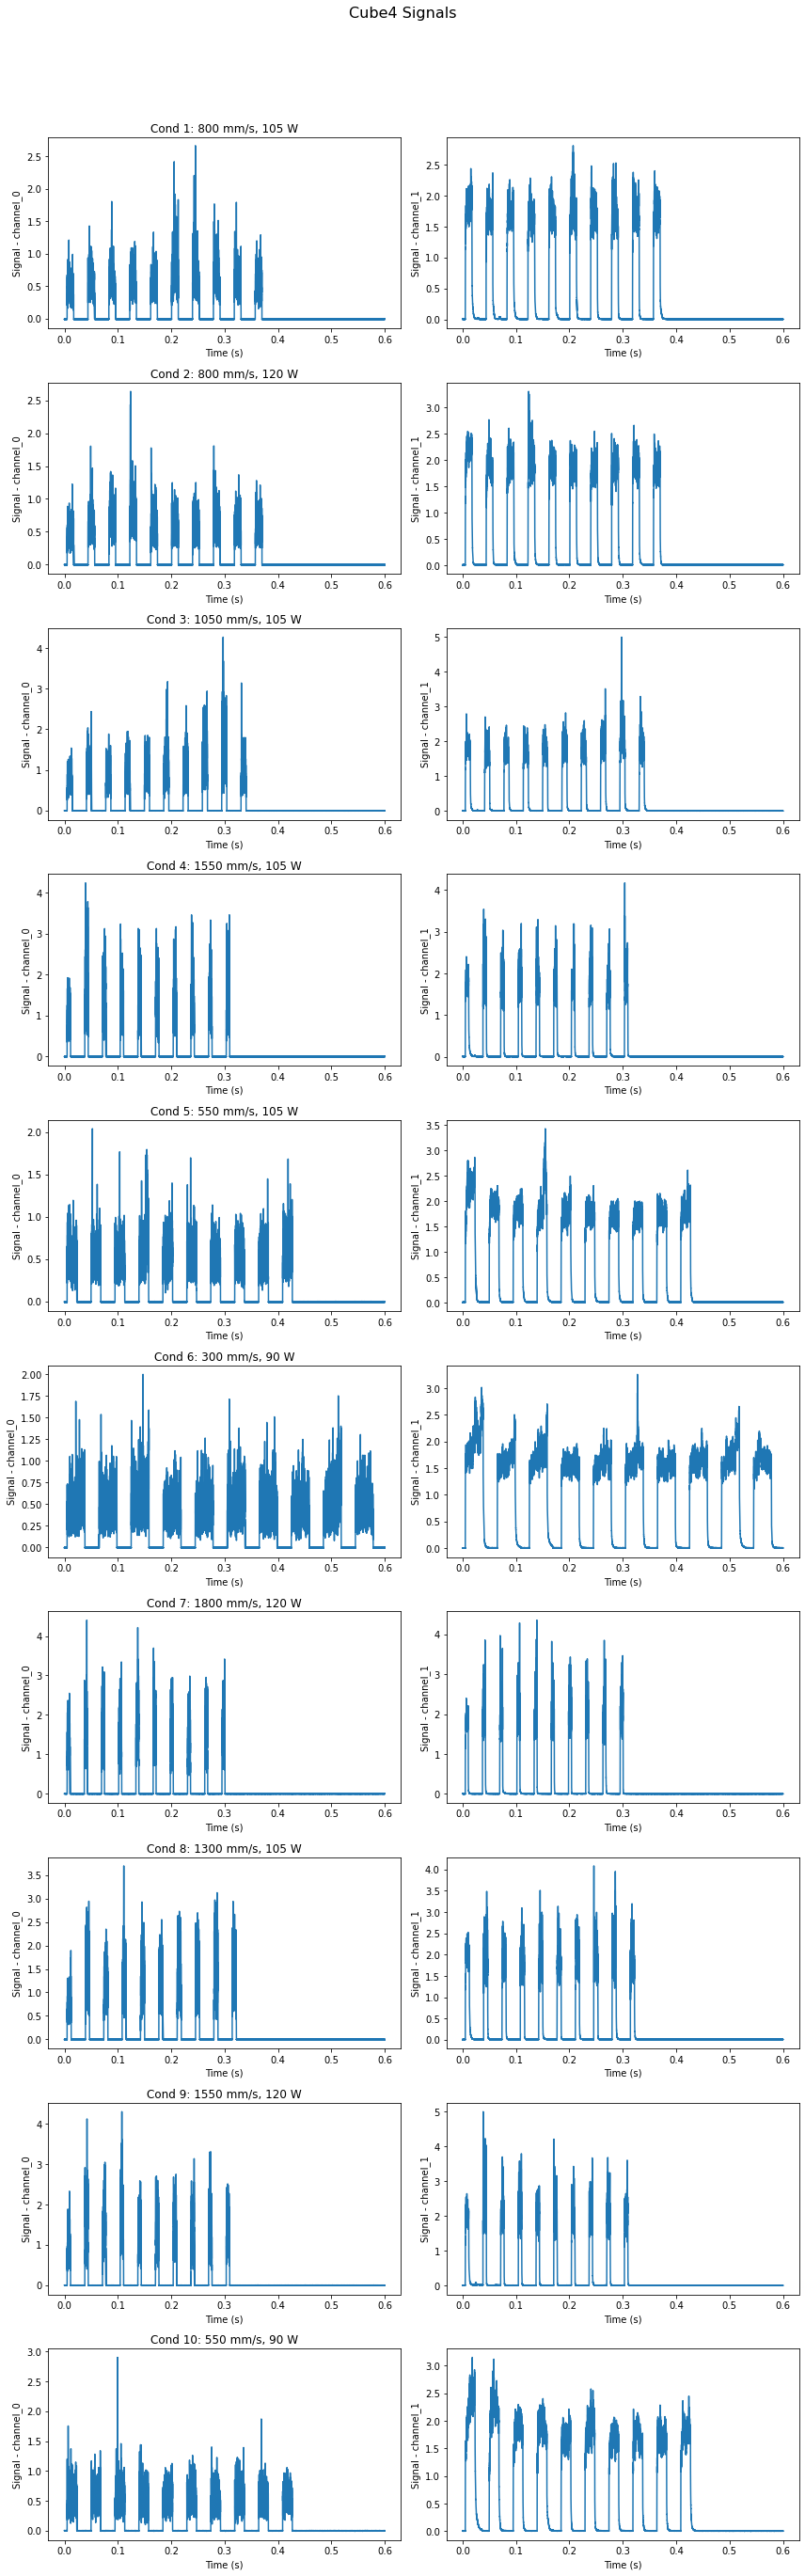

In [4]:
plot_cube_signals(4)


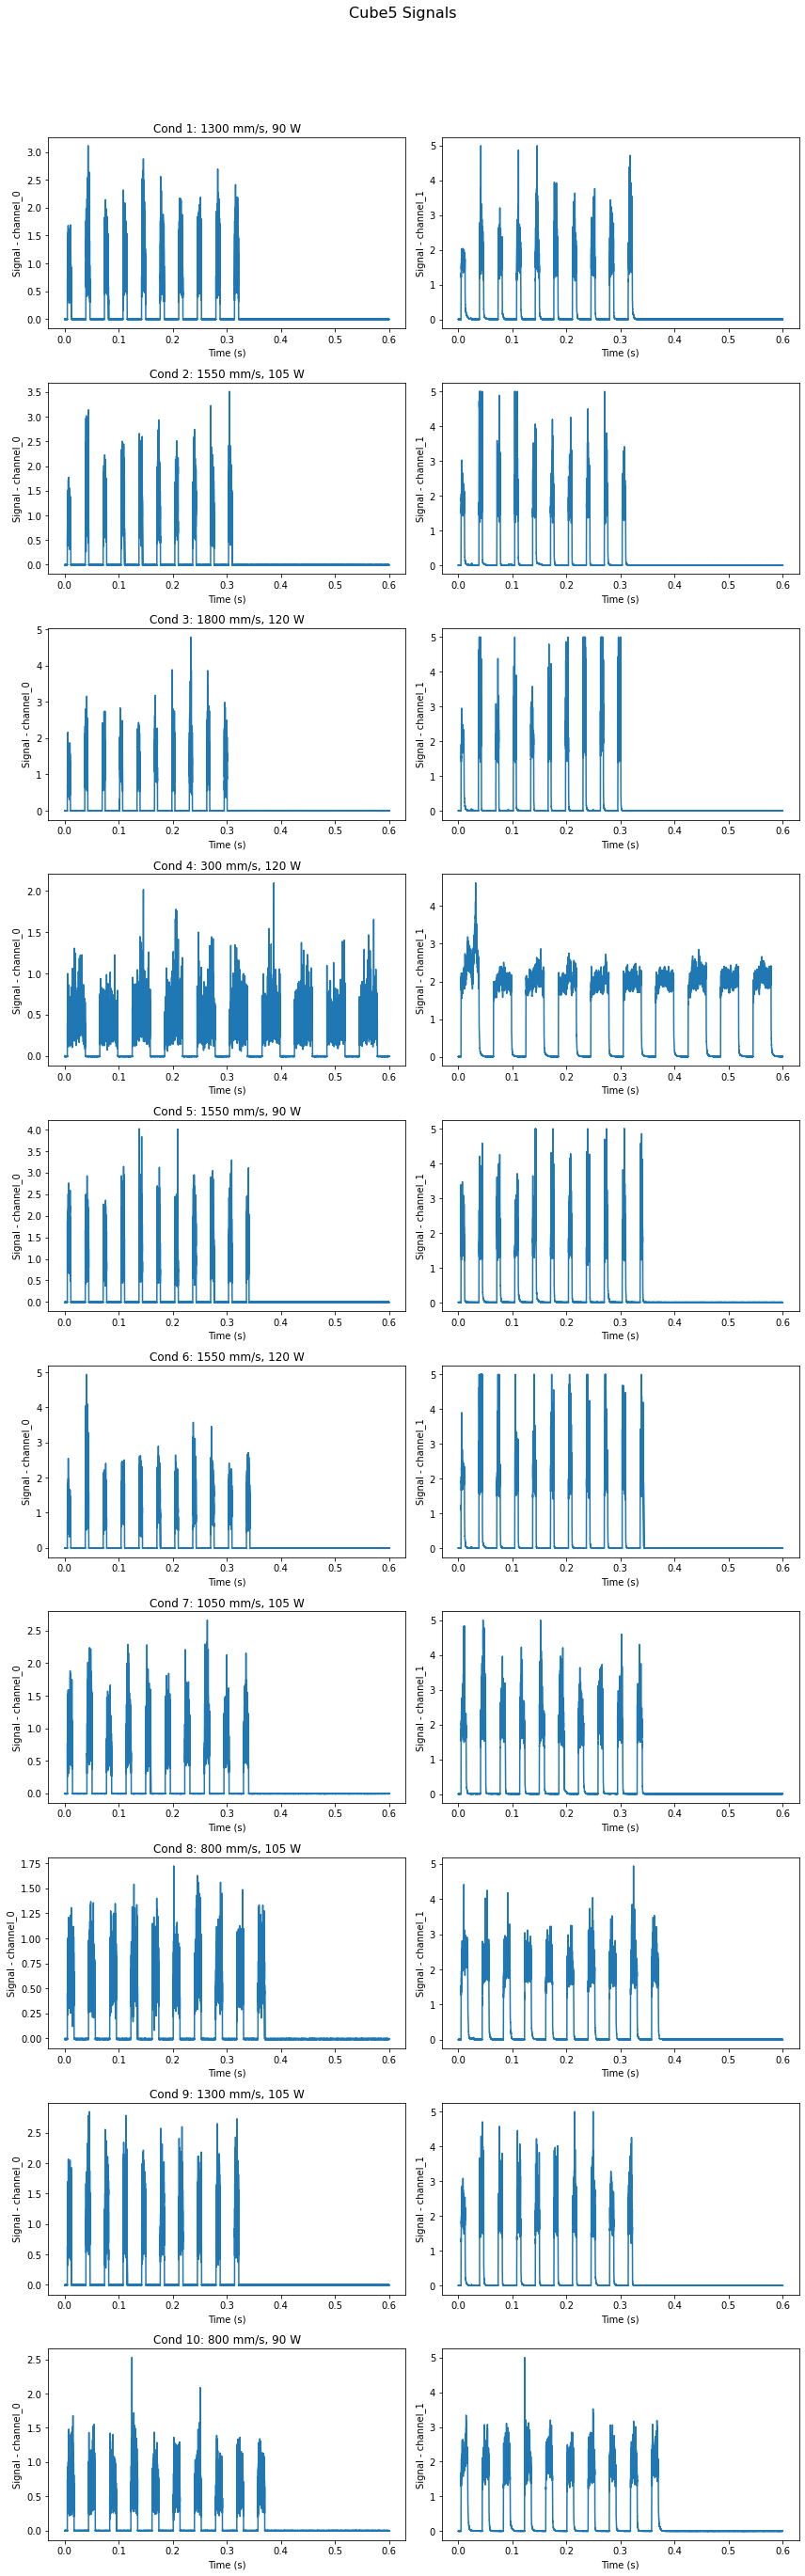

In [5]:
plot_cube_signals(5)


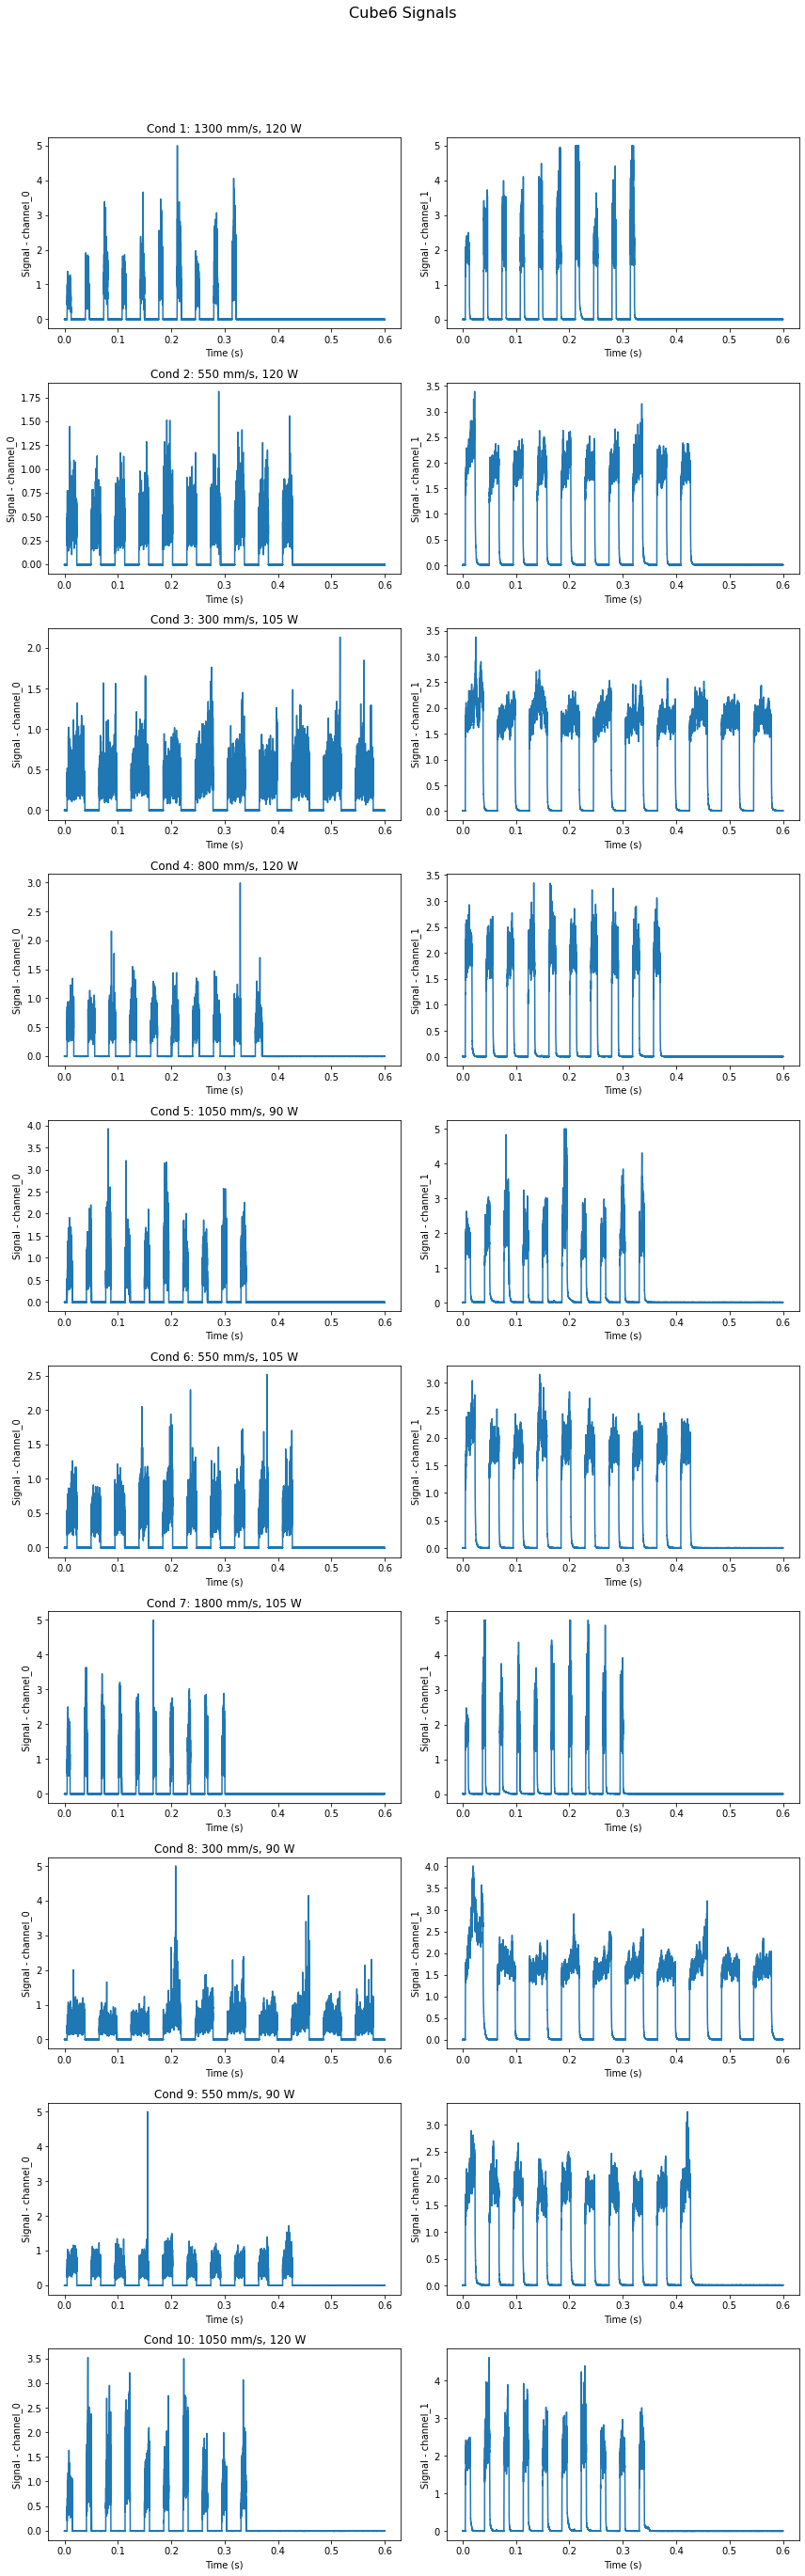

In [6]:
plot_cube_signals(6)


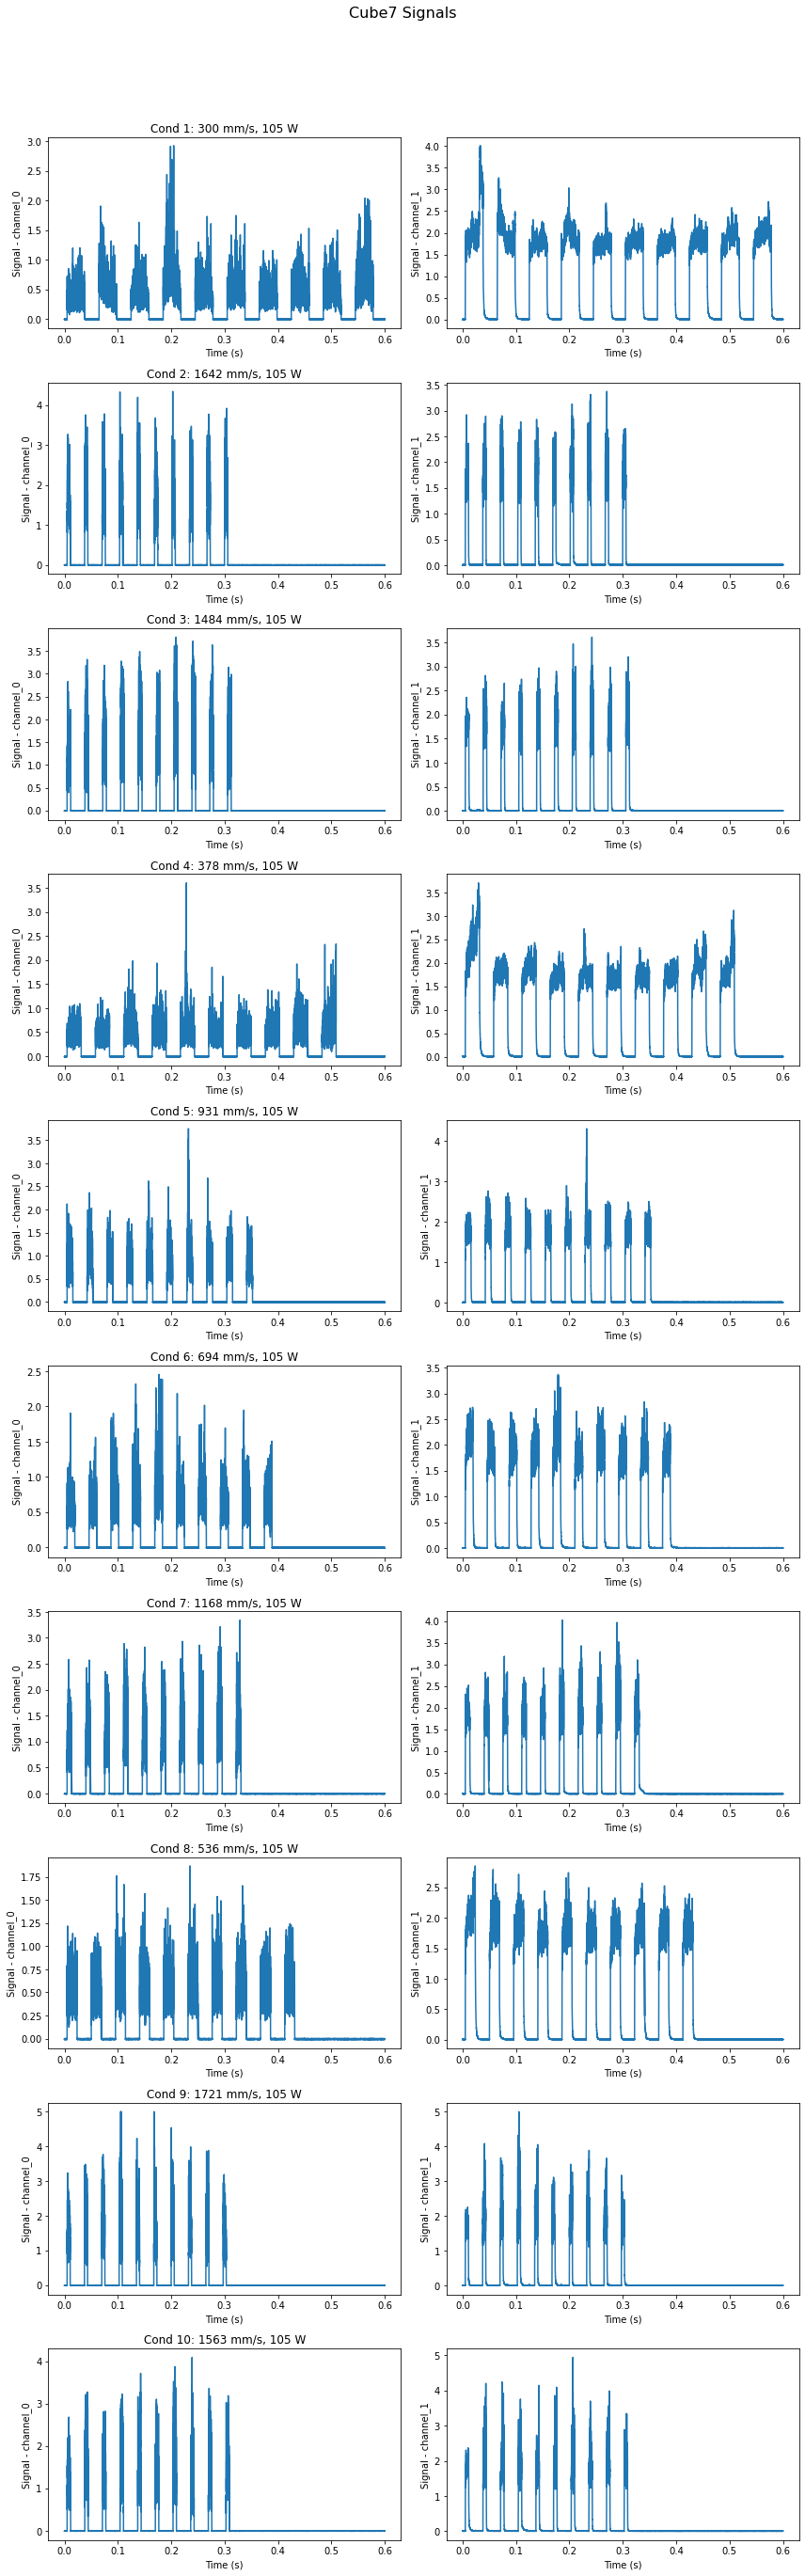

In [7]:
plot_cube_signals(7)


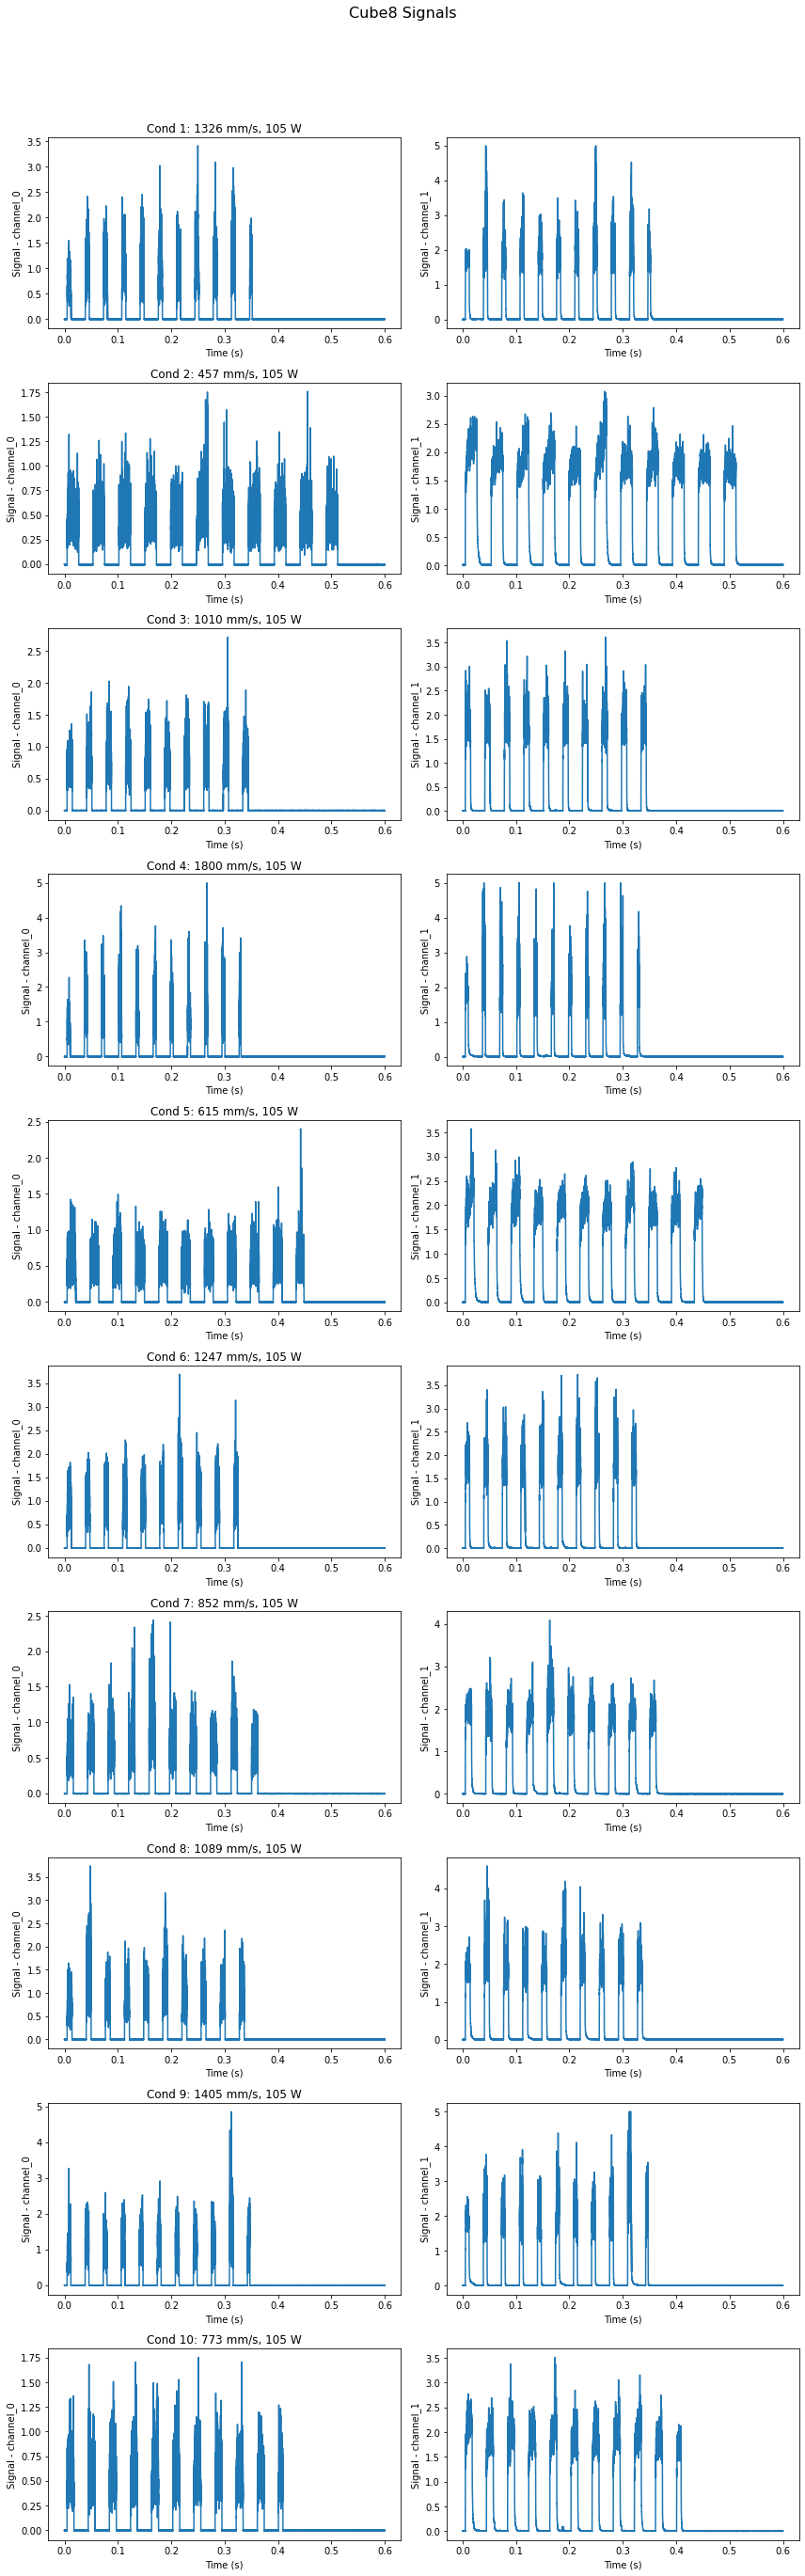

In [8]:
plot_cube_signals(8)


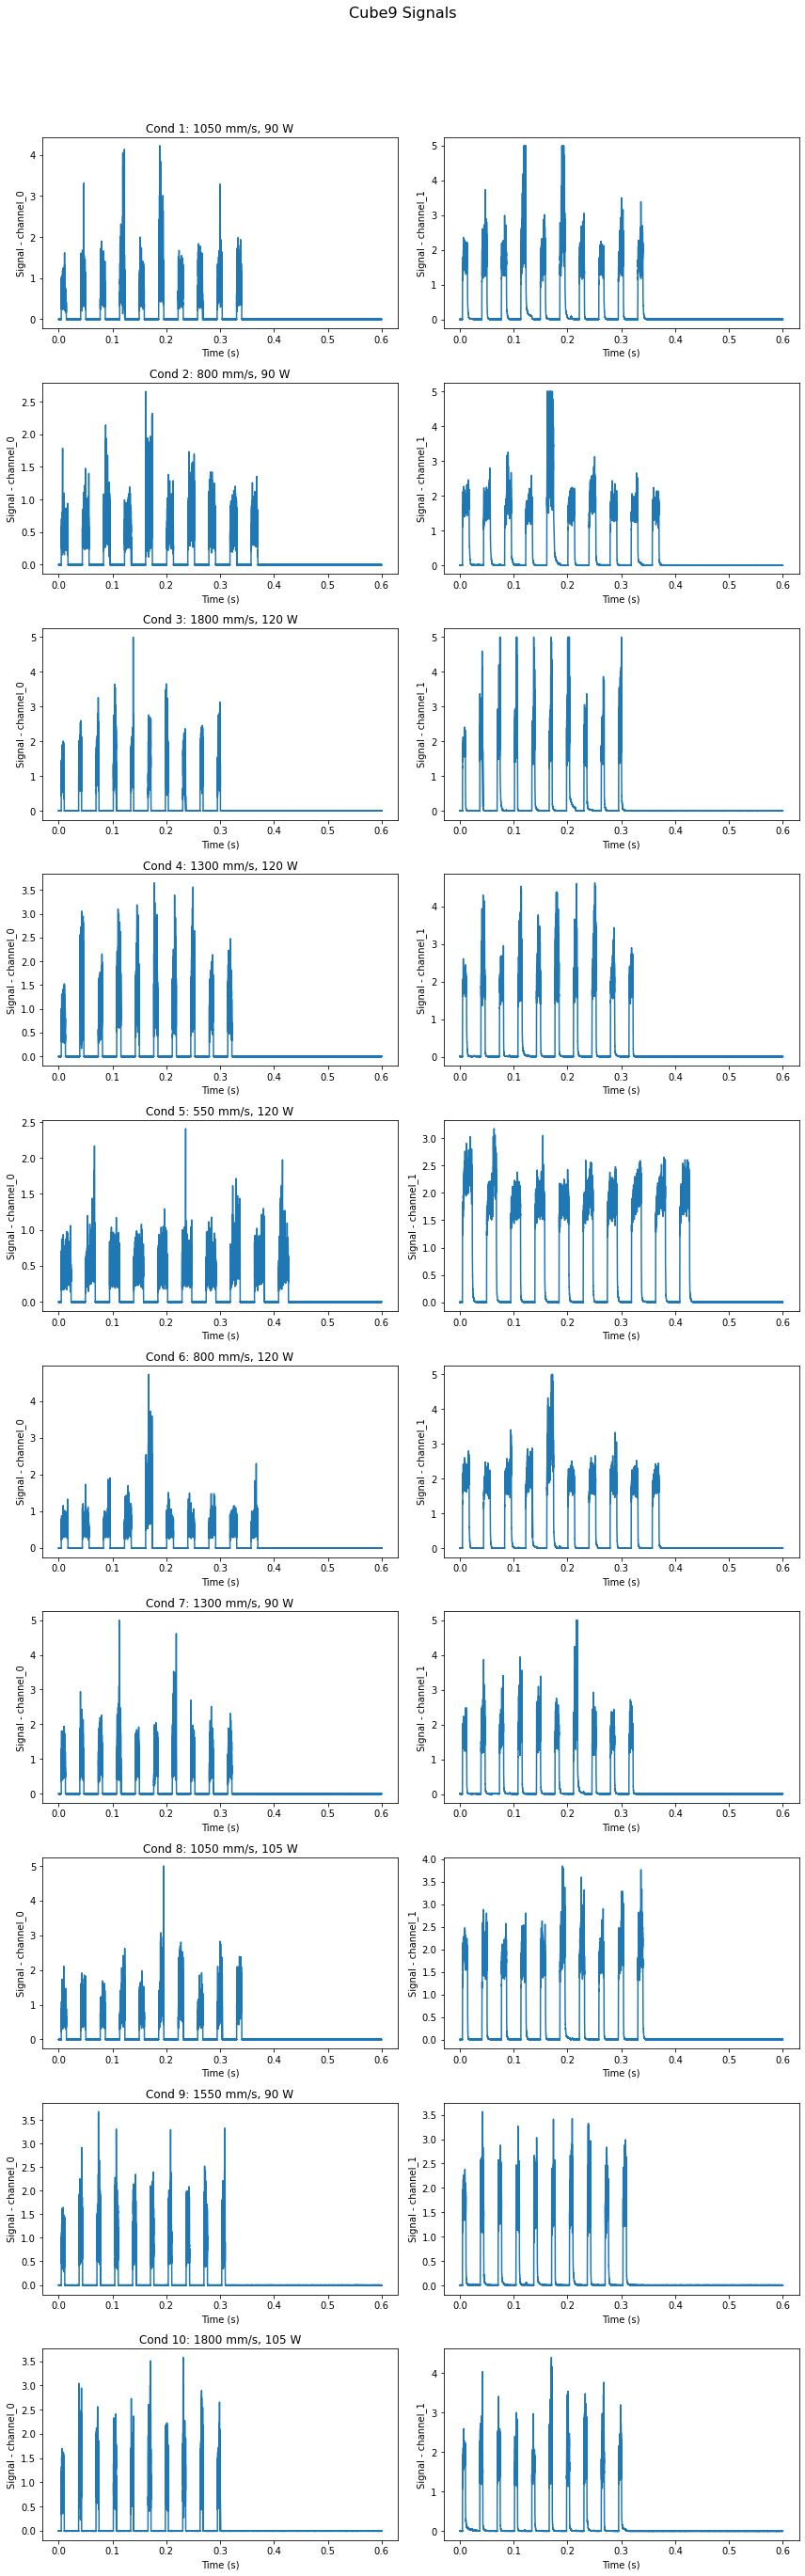

In [9]:
plot_cube_signals(9)
